<a href="https://colab.research.google.com/github/VDidyk/AI/blob/master/module5/%D0%94%D0%97_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оберіть одне завдання на вибір

# Завдання 1

За допомогою сегментації зображень замінітть фон для зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/humans.jpg

на фон з https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/forest.jpg

* отримайте маску для зображення людей, де `True` - піксель класу людини, `False` - піксель іншого класу
* зробіть зображення лісу такого ж розміру як і зображення людей
* застосуйте маску щоб змінити значення пікселів зображення лісу на пікселі зображення людей
* Якщо результат поганий можете спробувати використати маску для класу `__background`

In [2]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision import transforms

# Завантажуємо зображення
img = read_image("humans.jpg")

# Змінюємо розмір
img = transforms.Resize((520, 520))(img)

# Завантажуємо натреновану модель
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 159MB/s]


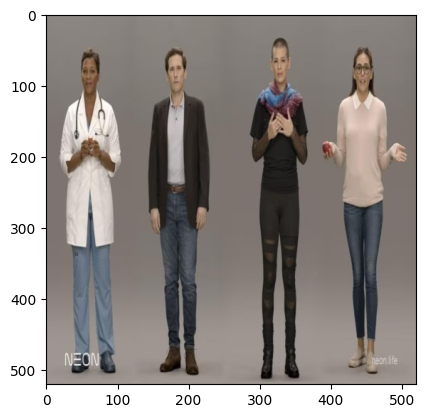

In [3]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img.permute(1, 2, 0))

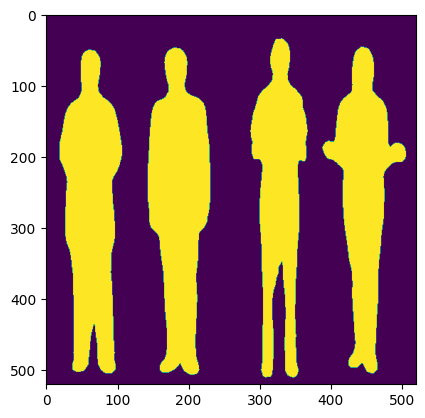

In [4]:
plt.imshow(mask)


In [5]:
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx


{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

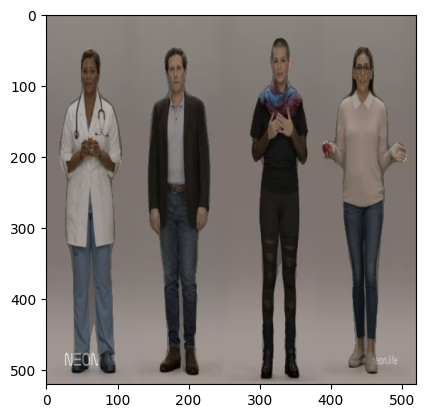

In [6]:
from torchvision.utils import draw_segmentation_masks

person_mask = mask == class_to_idx['person']

masked_img = draw_segmentation_masks(img, person_mask, alpha=0.3)

plt.imshow(masked_img.permute(1, 2, 0))

<ipython-input-7-95b1cbb4e8ef>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  replacement_tensor = torch.tensor(replacement_img)


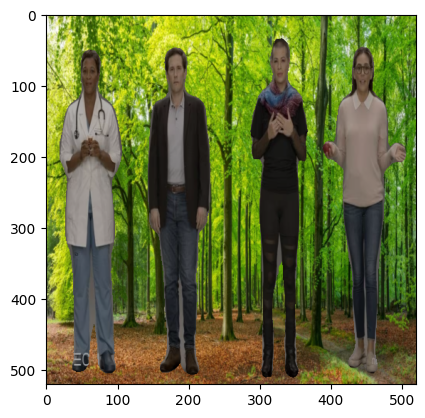

In [7]:
import cv2
import torch
from matplotlib import pyplot as plt

# Завантаження зображень
replacement_img = read_image('forest.jpg')
replacement_img = transforms.Resize((520, 520))(replacement_img)

# Зчитування розмірів masked_img
height, width, _ = img.shape

replacement_tensor = torch.tensor(replacement_img)

masked_img[:, ~person_mask] = replacement_img[:, ~person_mask]

# Відображення результату
plt.imshow(masked_img.permute(1, 2, 0).numpy())
plt.show()

# Завдання 2

Проведіть детекцію об'єктів для відео

https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/Highway%20driving%20during%20the%20day%20front%20view%20camera%20driving%20plate%204k%20footage.mp4

Підберіть параметри для якісного виявлення машин та знаків
Код для перетворення набору зображень у відео є нижче

[документація](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html)

In [9]:
import cv2
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()

def detect_objects(image):
    results = model(image)
    return results


video_path = 'Highway driving during the day front view camera driving plate 4k footage.mp4'
video_capture = cv2.VideoCapture(video_path)

fig = plt.figure()
ims = []
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = detect_objects(frame_rgb)

    frame_with_boxes = results.render()[0]

    im = plt.imshow(frame_with_boxes, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

ani.save('output.mp4')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-24 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Завдання 3
Згенеруйте зображення на основі тексту

документація



In [11]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00


In [12]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
	"runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16"
).to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

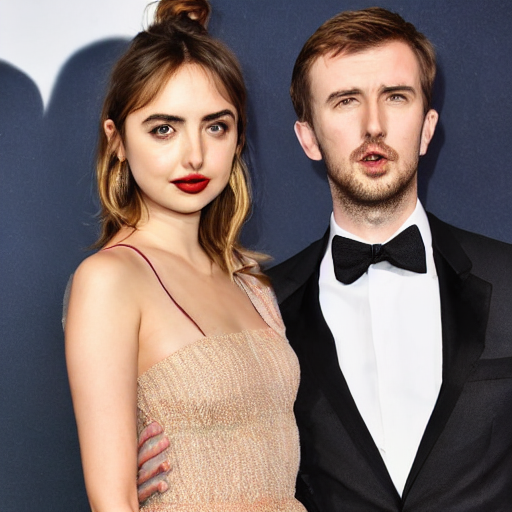

In [17]:
image = pipeline(
	"Ana De Armas and Evans"
).images[0]
image